<a href="https://colab.research.google.com/github/RahulHipparkar/Ninjacart-Image-Classification-using-CNN/blob/main/Ninjacart_CV_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏆 About Project

## 🎯 Objective

Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes. We have been tasked with preparing a multiclass classifier for identifying these vegetables. The dataset provided has all the required images to achieve the task.


## 🛒 How Ninjacart Works

<br><img src='https://drive.google.com/uc?id=1boHYwht03R1zj8lsBpK8o6OKRd1HjLDH' height=335>


## 🖋️ Problem Overview
<br><img src='https://drive.google.com/uc?id=1vDh8wK3aDfjQo3BVsVn57yVRQG6L0lfQ' height=400>

# 🚀 Let's Get Started

## 📚 Importing Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

## 📂 Importing Dataset

In [2]:
!gdown 1IctqyImXoC6joVTQDh7sNTZApmNmdkMg

Downloading...
From (original): https://drive.google.com/uc?id=1IctqyImXoC6joVTQDh7sNTZApmNmdkMg
From (redirected): https://drive.google.com/uc?id=1IctqyImXoC6joVTQDh7sNTZApmNmdkMg&confirm=t&uuid=dea44ee8-d8e4-4ae4-9012-4ac2c0ee3c41
To: /content/ninjacart_data.zip
100% 275M/275M [00:02<00:00, 120MB/s]


In [3]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indian market/

## 🎨 Custom Color Palette

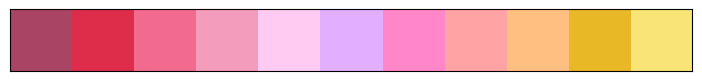

In [4]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]
custom_palette(pink)


## 🔍 Basic Analysis

### 🔬 Data Expolaration

<h3> Let's analyze what data we have curated !

> We can visualize from the data directory, the data is divided into train/test folders,
<br>consisting of four subfolders containing images of :
 - Indian market
 - Onion
 - Potato
 - Tomato
 <br><br>
><h4>Directory structure of our Dataset<br>
><img src='https://drive.google.com/uc?id=18uxOob7hI6xAIcHlF26tn7ppG9-Y2KkY' width=230>

### 📈 Data Visualization

Now let's plot some random images from our Dataset from each class !

In [5]:
# step 1
train_folder = '/content/ninjacart_data/train'
images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder,folder,image))

In [6]:
images

['/content/ninjacart_data/train/indian market/market11274.jpeg',
 '/content/ninjacart_data/train/indian market/market11162.jpeg',
 '/content/ninjacart_data/train/indian market/market11042.jpeg',
 '/content/ninjacart_data/train/indian market/photo-1646578537572-4426d9109e99.jpeg',
 '/content/ninjacart_data/train/indian market/photo-1662102073441-5d0a40a157e8.jpeg',
 '/content/ninjacart_data/train/indian market/market11120.jpeg',
 '/content/ninjacart_data/train/indian market/market11033.jpeg',
 '/content/ninjacart_data/train/indian market/market11308.jpeg',
 '/content/ninjacart_data/train/indian market/photo-1569180880150-df4eed93c90b.jpeg',
 '/content/ninjacart_data/train/indian market/photo-1659367555218-a8aa70da7ed4.jpeg',
 '/content/ninjacart_data/train/indian market/market11327.jpeg',
 '/content/ninjacart_data/train/indian market/photo-1524314612445-2aeca1677be9.jpeg',
 '/content/ninjacart_data/train/indian market/market11062.jpeg',
 '/content/ninjacart_data/train/indian market/mark

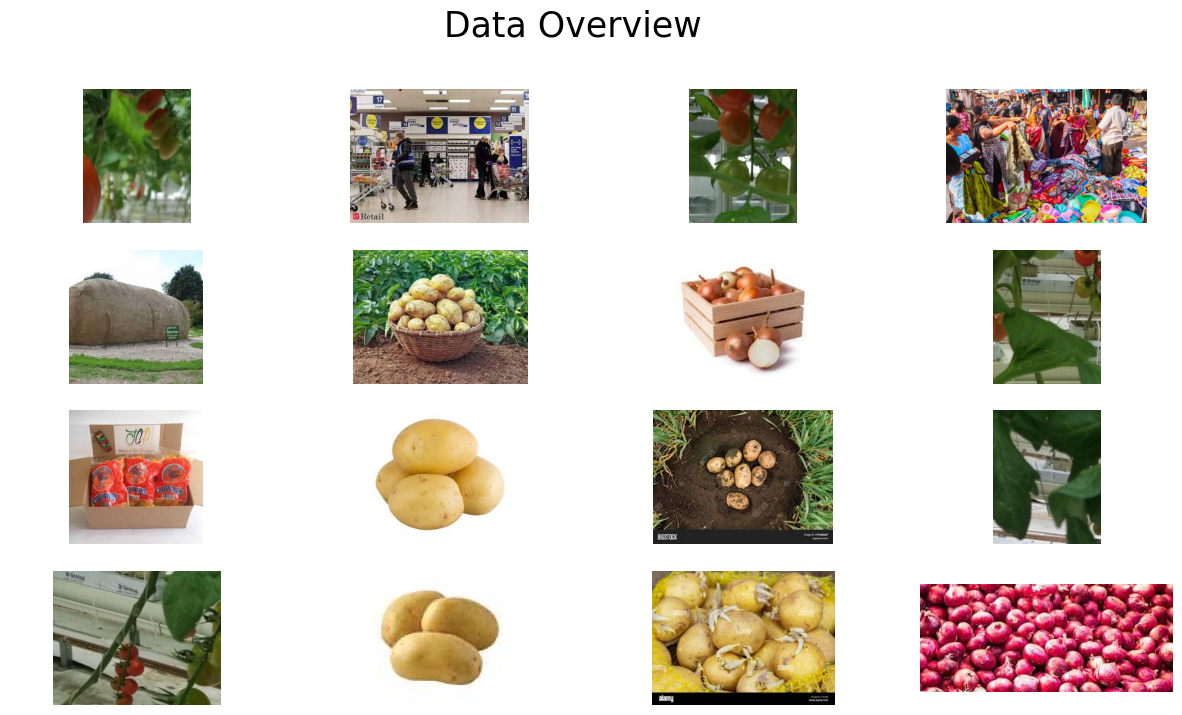

In [7]:
# step 2
plt.figure(figsize = (15,8))
plt.suptitle('Data Overview', fontsize=25)
plt.axis('off')
for i in range(16):
  random_img = random.choice(images)
  img = tf.keras.utils.load_img(random_img)
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(img)
plt.show()

### 📏 Dimension Analysis

In [8]:
class_dirs = os.listdir('/content/ninjacart_data/train')
image_dict = {}
count_dict= {}
for cls in class_dirs:
  file_paths = glob.glob(f'/content/ninjacart_data/train/{cls}/*')
  count_dict[cls] = len(file_paths)
  image_path = random.choice(file_paths)
  image_dict[cls] = tf.keras.utils.load_img(image_path)

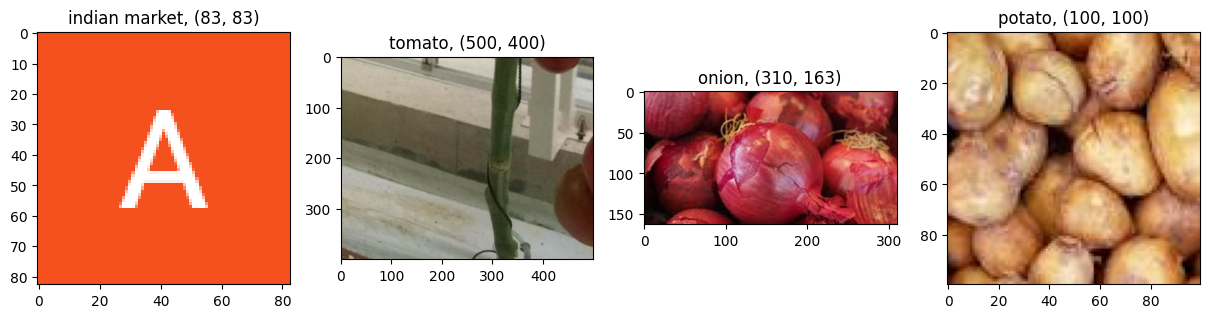

In [9]:
plt.figure(figsize = (15,8))
for i,(cls,img) in enumerate(image_dict.items()):
  plt.subplot(1,4,i+1)
  plt.imshow(img)
  plt.title(f'{cls}, {img.size}')
plt.show()

 **Inference**:

-  Dataset consists of uneven sized images.
- We have some images of the market, which we will label as class 'noise'
- To feed this data into our models, we need to preprocess it.

### 📊 Class Distribution

In [10]:
df_count = pd.DataFrame({'class':count_dict.keys(), 'count':count_dict.values()})
df_count

,class,count
0,indian market,599
1,tomato,789
2,onion,849
3,potato,898


In [11]:
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px


In [12]:
x = df_count['class']
y = df_count['count']
go.Figure(go.Bar(x=x, y=y))

**Inference**

Data is not evenly distributed but not imbalanced we are good to go.

# 🛠️ Data Preprocessing

## 📅 Creating Train , Test and Validation datasets

In [13]:
train_dir =  '/content/ninjacart_data/train'
test_dir  =  '/content/ninjacart_data/test'

In [14]:
train_ds =  tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (256,256),
    seed = 42,
    validation_split = 0.2,
    subset ='training',
    shuffle = True

)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [15]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = (256,256),
                                                       seed = 2022,
                                                      )

Found 351 files belonging to 4 classes.


In [16]:
valid_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = (256, 256),
                                                       seed = 2022,
                                                       validation_split = 0.2,
                                                       subset = "validation")

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


## 📏 Rescaling the data

In [17]:
data_preprocess = keras.Sequential(
    name = 'data_preprocess',
    layers = [
        layers.Rescaling(1./255)
    ]
)

In [18]:
train_ds = train_ds.map(lambda x,y: (data_preprocess(x),y))
test_ds = test_ds.map(lambda x,y: (data_preprocess(x),y))
valid_ds = valid_ds.map(lambda x,y: (data_preprocess(x),y))

**Inference**

Data is preprocessed , now we can used it build our CNN model

# 🧠 Building Custom CNN model

## 🏗️ Defining the model architecture

In [19]:
model = keras.Sequential(
    name = 'ninjacart_model',
    layers = [
        layers.InputLayer(input_shape = (256,256,3)),
        layers.Conv2D(filters = 32, kernel_size = (3,3), padding ='Same', activation = 'relu'),
        layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
        layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(4, activation = 'softmax')


    ]
)

## 🏃‍♂️ Compiling the model

In [20]:
model.summary()

Model: "ninjacart_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,940 (546.64 KB)

 Trainable params: 139,940 (546.64 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile( optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy', 'Precision', 'Recall']  )

## 🏋️‍♀️ Model training

In [22]:
# implementing Tensorboard callbacks

In [23]:
logs_dir_1 = 'custom_model_overfilt'
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = logs_dir_1, histogram_freq=1)

In [24]:
history = model.fit(train_ds, epochs = 20, validation_data = valid_ds, callbacks = [tensorboard_cb])

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2685 - loss: 1.3676 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3190 - val_loss: 1.2742
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Precision: 0.5606 - Recall: 0.0451 - accuracy: 0.5027 - loss: 1.1906 - val_Precision: 0.7922 - val_Recall: 0.4561 - val_accuracy: 0.6603 - val_loss: 0.8911
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - Precision: 0.8259 - Recall: 0.5221 - accuracy: 0.7032 - loss: 0.8362 - val_Precision: 0.8219 - val_Recall: 0.6108 - val_accuracy: 0.7352 - val_loss: 0.7243
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - Precision: 0.8164 - Recall: 0.6265 - accuracy: 0.7414 - loss: 0.7154 - val_Precision: 0.8204 - val_Recall: 0.6555 - val_accuracy: 0.7448 - val_loss: 0.6537
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Precision: 0.8256 - Recall: 0.6741 - accuracy: 0.7701 - loss: 0.6644 - val_Precision: 0.7927 

## 📈 Plotting  our model's performance